In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as spo
import matplotlib.pyplot as plt

# Basics

In [2]:
def get_df(symbol):
    return pd.read_csv("data/{}.csv".format(symbol))

To select rows between index 10 and 20

In [3]:
df = get_df('AAPL')
print(df[10:21])

          Date      High       Low      Open     Close       Volume  Adj Close
10  2000-01-18  3.785714  3.587054  3.607143  3.712054  114794400.0   3.222214
11  2000-01-19  3.883929  3.691964  3.772321  3.805804  149410800.0   3.303592
12  2000-01-20  4.339286  4.053571  4.125000  4.053571  457783200.0   3.518665
13  2000-01-21  4.080357  3.935268  4.080357  3.975446  123981200.0   3.450849
14  2000-01-24  4.026786  3.754464  3.872768  3.794643  110219200.0   3.293904
15  2000-01-25  4.040179  3.656250  3.750000  4.008929  124286400.0   3.479914
16  2000-01-26  4.078125  3.919643  3.928571  3.935268   91789600.0   3.415973
17  2000-01-27  4.035714  3.821429  3.886161  3.928571   85036000.0   3.410160
18  2000-01-28  3.959821  3.593750  3.863839  3.629464  105837200.0   3.150523
19  2000-01-31  3.709821  3.375000  3.607143  3.705357  175420000.0   3.216401
20  2000-02-01  3.750000  3.571429  3.714286  3.580357   79508800.0   3.107896


get max close values

In [4]:
def get_max_mean(symbol, col):
    df = get_df(symbol)
    return df[col].max(), df[col].mean()

In [5]:
symbols = ['AAPL', 'IBM']
cols = ['Close', 'Volume']
for col in cols:
    print("Max and mean of {}".format(col))
    for symbol in symbols:
        print(symbol, get_max_mean(symbol, col))

Max and mean of Close
AAPL (327.20001220703125, 62.92220281901041)
IBM (215.8000030517578, 129.51162854477175)
Max and mean of Volume
AAPL (1855410200.0, 113941528.21871941)
IBM (41207300.0, 6121088.996475426)


To plot adjusted close of  AAPL

In [6]:
def plot(symbol, col):
    df = get_df(symbol)
    df[col].plot()
    plt.show()

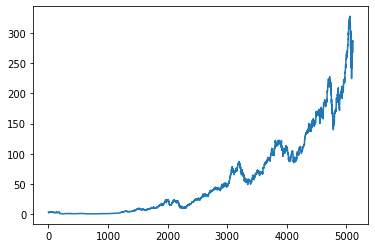

In [7]:
plot('AAPL', 'Adj Close')

Plot high prices of IBM

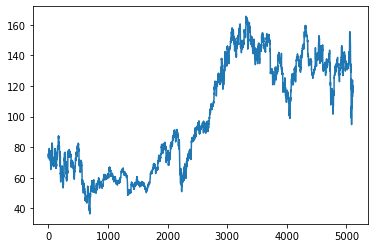

In [8]:
plot('IBM', 'Adj Close')

Joining two data frames

In [9]:
def get_date_adj_close(symbol):
    return pd.read_csv("data/{}.csv".format(symbol),
                         index_col="Date",
                         parse_dates=True,
                         usecols=['Date', 'Adj Close'],
                         na_values=['nan'])

In [10]:
def get_df_date_range(start_date, end_date, symbol, drop_na=True):
    dates = pd.date_range(start_date, end_date)
    #create empty data frame
    df = pd.DataFrame(index=dates)
    #read original file
    df_tmp = get_date_adj_close(symbol)
    #join the dataframes
    df = df.join(df_tmp, how='inner')
    #drop nan values
    if drop_na:
        df = df.dropna()
    return df
    

In [11]:
print(get_df_date_range('2010-01-22', '2010-01-26', 'SPY'))

            Adj Close
2010-01-22  88.892502
2010-01-25  89.348351
2010-01-26  88.973915


In [12]:
def combine_symbols_spy(symbols):
    df_spy = get_df_date_range('2010-01-22', '2010-01-26', 'SPY', False)
    df_spy = df_spy.rename(columns={'Adj Close':'SPY'})
    for symbol in symbols:
        df_temp = get_date_adj_close(symbol)
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df_spy=df_spy.join(df_temp) # default join is left
    return df_spy

In [13]:
print(combine_symbols_spy(['GOOG', 'IBM', 'GLD']).head())

                  SPY        GOOG        IBM         GLD
2010-01-22  88.892502  273.978058  90.957825  107.169998
2010-01-25  89.348351  268.991760  91.407166  107.480003
2010-01-26  88.973915  270.197235  91.139023  107.559998


In [14]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col='Date',
        parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df = df.join(df_temp, how='inner')
    return df

Combining different stocks

In [15]:
symbols = ['GOOG', 'IBM', 'GLD', 'XOM']
dates = pd.date_range('2010-01-01', '2010-12-31')
# Get stock data
df = get_data(symbols, dates)
print (df.head())

                  SPY        GOOG        IBM         GLD        XOM
2010-01-04  92.246048  312.204773  95.994934  109.800003  49.342556
2010-01-05  92.490204  310.829926  94.835304  109.699997  49.535217
2010-01-06  92.555328  302.994293  94.219246  111.510002  49.963345
2010-01-07  92.946060  295.940735  93.893105  110.820000  49.806370
2010-01-08  93.255348  299.885956  94.835304  111.370003  49.606567


Row slicing

In [16]:
print(df['2010-01-01':'2010-01-31'])

                  SPY        GOOG        IBM         GLD        XOM
2010-01-04  92.246048  312.204773  95.994934  109.800003  49.342556
2010-01-05  92.490204  310.829926  94.835304  109.699997  49.535217
2010-01-06  92.555328  302.994293  94.219246  111.510002  49.963345
2010-01-07  92.946060  295.940735  93.893105  110.820000  49.806370
2010-01-08  93.255348  299.885956  94.835304  111.370003  49.606567
2010-01-11  93.385582  299.432648  93.842384  112.849998  50.163143
2010-01-12  92.514610  294.137512  94.588867  110.489998  49.913410
2010-01-13  93.296059  292.448822  94.385933  111.540001  49.713615
2010-01-14  93.548347  293.823669  95.893456  112.029999  49.720753
2010-01-15  92.498352  288.917053  95.509315  110.860001  49.314018
2010-01-19  93.654198  292.712830  97.219757  111.519997  49.428196
2010-01-20  92.701836  289.121307  94.400459  108.940002  48.543373
2010-01-21  90.919273  290.401489  93.494507  107.370003  47.594334
2010-01-22  88.892502  273.978058  90.957825  10

Column slicing, a sigle label selects a single column

In [17]:
print(df['GOOG'])

2010-01-04    312.204773
2010-01-05    310.829926
2010-01-06    302.994293
2010-01-07    295.940735
2010-01-08    299.885956
                 ...    
2010-12-27    300.065277
2010-12-28    298.341736
2010-12-29    299.377869
2010-12-30    298.311859
2010-12-31    295.875977
Name: GOOG, Length: 252, dtype: float64


A column of labels select multiple columns

In [18]:
print(df[['IBM', 'GLD']])

                   IBM         GLD
2010-01-04   95.994934  109.800003
2010-01-05   94.835304  109.699997
2010-01-06   94.219246  111.510002
2010-01-07   93.893105  110.820000
2010-01-08   94.835304  111.370003
...                ...         ...
2010-12-27  107.352524  135.020004
2010-12-28  107.625832  137.220001
2010-12-29  108.224121  137.710007
2010-12-30  108.334892  137.029999
2010-12-31  108.401382  138.720001

[252 rows x 2 columns]


slice row and column

In [19]:
print((df['2010-03-10':'2010-03-15'])[['IBM', 'GLD']])

                  IBM         GLD
2010-03-10  91.451981  108.470001
2010-03-11  92.893440  108.599998
2010-03-12  93.140976  107.949997
2010-03-15  93.060898  108.360001


Plotting multiple data. 

In [20]:
def plot_df(df, title='Stock prices', ylabel='Price'):
    ax = df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    plt.show()

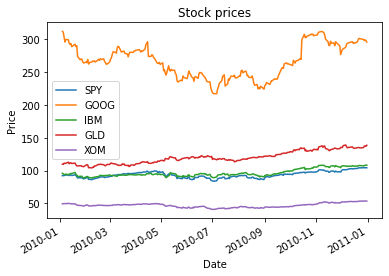

In [21]:
plot_df(df)

In [22]:
def normalize_data(df):
    return df/df.iloc[0]

Normalising the data

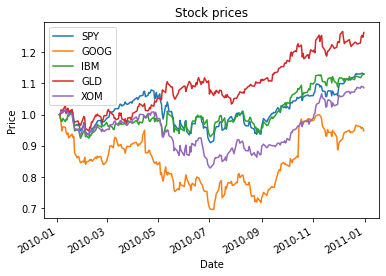

In [23]:
plot_df(normalize_data(df))

# Statistics

Computing global statistics

In [24]:
print("Mean of the data frame \n", df.mean())

Mean of the data frame 
 SPY      93.682763
GOOG    266.811472
IBM      96.565526
GLD     120.069762
XOM      47.035152
dtype: float64


In [25]:
print("Median of the data frame \n", df.median())

Median of the data frame 
 SPY      92.970467
GOOG    266.162354
IBM      94.319302
GLD     118.754997
XOM      46.990263
dtype: float64


In [26]:
print("Standard deviation of the data frame \n", df.std())

Standard deviation of the data frame 
 SPY      4.861229
GOOG    25.136143
IBM      5.682099
GLD      9.537110
XOM      3.145461
dtype: float64


Getting the rolling mean and std

In [27]:
def get_rolling_mean(values, window):
    return values.rolling(window).mean()

def get_rolling_std(values, window):
    return values.rolling(window).std()

Compute upper and lower Bollinger Bands.

In [28]:
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band

In [29]:
def plot_bollinger_band_symbol(df, symbol):
    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df[symbol], window=20)
    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df[symbol], window=20)
    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df[symbol].plot(title="Bollinger Bands", label=symbol)
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)
    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()

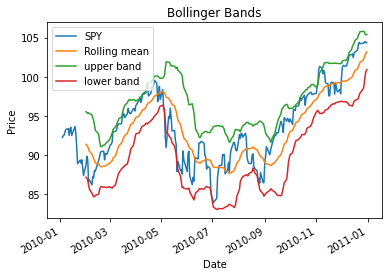

In [30]:
plot_bollinger_band_symbol(df, 'SPY')

Compute daily returns

In [31]:
def compute_daily_returns(df):
    dftmp = df.copy()
    dftmp.iloc[1:,:] = (dftmp.values[1:,:] / dftmp.values[:-1,:])-1
    dftmp.iloc[0,:] = 0
    return dftmp

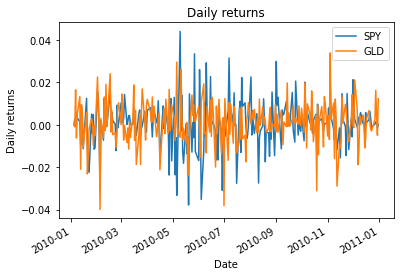

In [32]:
daily_rtn_df = compute_daily_returns(df[['SPY', 'GLD']])
plot_df(daily_rtn_df, title="Daily returns", ylabel="Daily returns")

Plotting histogram with mean and std

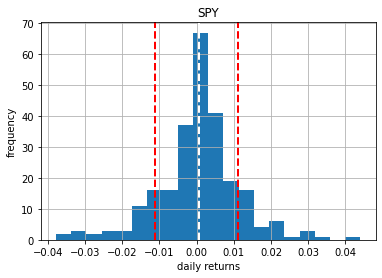

In [33]:
daily_rtn_df['SPY'].hist(bins=20, label='SPY')
mean = daily_rtn_df['SPY'].mean()
std = daily_rtn_df['SPY'].std()
plt.title('SPY')
plt.ylabel('frequency')
plt.xlabel('daily returns')
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

Get kurtosis

In [34]:
print("The kurtosis is", daily_rtn_df['SPY'].kurtosis())

The kurtosis is 2.152463972355421


Plotting two histograms together

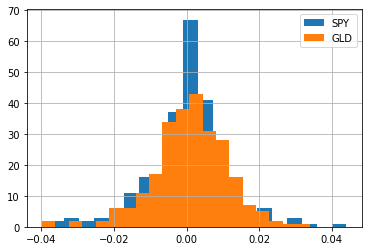

In [35]:
daily_rtn_df['SPY'].hist(bins=20, label='SPY')
daily_rtn_df['GLD'].hist(bins=20, label='GLD')
plt.legend(loc='upper right')
plt.show()

Comparing two stocks on a scatter plot. Later we compute the correlation and slope using the numpy polyfit function. We fit a straight line to the plot to obtain these values.

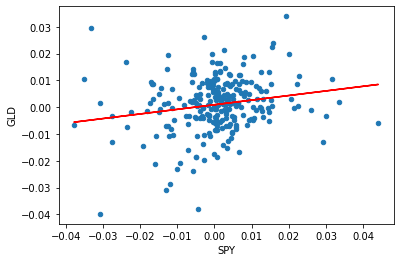

In [36]:
daily_rtn_df = compute_daily_returns(df)
daily_rtn_df.plot(kind='scatter', x='SPY', y='GLD')
beta_GLD, alpha_GLD = np.polyfit(daily_rtn_df['SPY'], daily_rtn_df['GLD'], 1) # degree one fit
plt.plot(daily_rtn_df['SPY'], beta_GLD*daily_rtn_df['SPY']+alpha_GLD, '-', color='r')
plt.show()

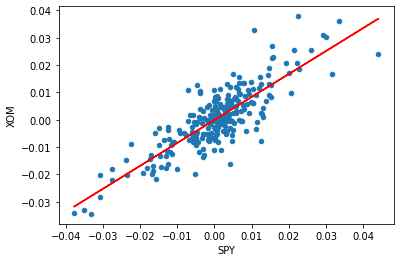

In [37]:
daily_rtn_df.plot(kind='scatter', x='SPY', y='XOM')
beta_XOM, alpha_XOM = np.polyfit(daily_rtn_df['SPY'], daily_rtn_df['XOM'], 1) # degree one fit
plt.plot(daily_rtn_df['SPY'], beta_XOM*daily_rtn_df['SPY']+alpha_XOM, '-', color='r')
plt.show()

Comparison of the plots

In [38]:
print("beta_XOM", beta_XOM)
print("alpha_XOM", alpha_XOM)
print("beta_GLD", beta_GLD)
print("alpha_GLD", alpha_GLD)

beta_XOM 0.8408491349519285
alpha_XOM -7.401632820397533e-05
beta_GLD 0.17204055790852021
alpha_GLD 0.0008868755722218124


Beta values show how the stock moves with respect to SPY. You can see that the beta values of the XOM is greater than that of the gold. This means XOM is more reactive to the market compared to GOLD. On the other hand, the alpha values denote how well it performed. Since the alpha value of GLD is better we can conclude that GLD performed better compared to XOM. Further we can confirm this by computing the correlation coeffiecient as follows.

In [39]:
print(daily_rtn_df.corr(method='pearson'))

           SPY      GOOG       IBM       GLD       XOM
SPY   1.000000  0.645445  0.781874  0.186382  0.836785
GOOG  0.645445  1.000000  0.491106  0.107257  0.525546
IBM   0.781874  0.491106  1.000000  0.153025  0.647008
GLD   0.186382  0.107257  0.153025  1.000000  0.180656
XOM   0.836785  0.525546  0.647008  0.180656  1.000000


You can see that XOM and SPY are highly correlated than GLD and SPY. This is also shown by the flatter line fit of the SPY-GLD graph compared to the SPY-XOM graph.

# Optimizers

We look into simple optimizers in the begining. 

In [40]:
#a parabola
def f(X):
    Y=(X-1.5)**2 + 0.5
    print("X={}, Y={}".format(X,Y))
    return Y

X=[2.], Y=[0.75]
X=[2.], Y=[0.75]
X=[2.00000001], Y=[0.75000001]
X=[0.99999999], Y=[0.75000001]
X=[1.5], Y=[0.5]
X=[1.5], Y=[0.5]
X=[1.50000001], Y=[0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X=[1.5], Y=0.5
X=[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y=[1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


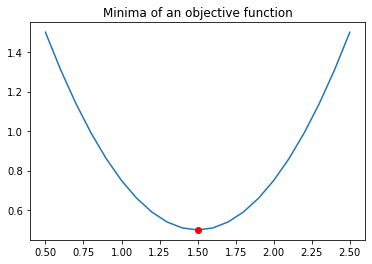

In [41]:
Xguess = 2.0
min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp':True})
print("Minima found at:")
print("X={}, Y={}".format(min_result.x, min_result.fun))
Xp = np.linspace(0.5, 2.5, 21)
Yp = f(Xp)
plt.plot(Xp, Yp)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title("Minima of an objective function")
plt.show()

In [42]:
#this function computes the error of a straigt line
#parameter with a data set
def error_line(line, data):
    return np.sum((data[:,1]-(line[0]*data[:,0]+line[1]))**2)

In [43]:
def minimize(err_func, guess, data):
    result = spo.minimize(err_func, guess, args=(data,), method='SLSQP', options={'disp':True})
    return result.x

Original line coefficients: C0 = 4, C1=2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 167.6005237506698
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Fit line coefficients: C0 = 3.8124150913350126, C1=3.5785586648705534


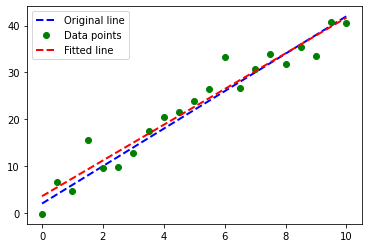

In [44]:
original_line = np.array([4,2])
print("Original line coefficients: C0 = {}, C1={}".format(original_line[0], original_line[1]))
Xo = np.linspace(0,10,21)
Yo = original_line[0] * Xo + original_line[1]
plt.plot(Xo, Yo, 'b--', linewidth=2, label='Original line')
noise_sigma = 3.
noise = np.random.normal(0, noise_sigma, Yo.shape)
data = np.asarray([Xo, Yo+noise]).T
plt.plot(data[:,0], data[:,1], 'go', label='Data points')
guess = np.array([1,5])
fit = minimize(error_line, guess, data)
print("Fit line coefficients: C0 = {}, C1={}".format(fit[0], fit[1]))
Yf = fit[0] * Xo + fit[1]
plt.plot(Xo, Yf, 'r--', linewidth=2, label='Fitted line')
plt.legend()
plt.show()

The same works for polynomials too.

In [47]:
def error_poly(C, data):
    #C= polynomial coeffients
    #data =(X,Y)
    return np.sum((data[:,1] - np.polyval(C, data[:,0]))**2)

Original poly coefficients
0: 1.5	 C1: -10.0	 C2: -5.0	 C3: 60.0	 C4: 50.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 148462.08453767537
            Iterations: 6
            Function evaluations: 50
            Gradient evaluations: 6
Fit line coefficients
0: 19.989491436282737	 C1: -194.7475289776206	 C2: 458.4619309420246	 C3: -104.9054303540533


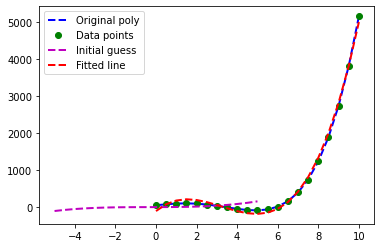

In [56]:
original_poly = np.array([1.5,-10,-5,60,50])
print("Original poly coefficients")
print('\t C'.join('{}: {}'.format(*k) for k in enumerate(original_poly)))
Xo = np.linspace(0,10,21)
Yo = np.polyval(original_poly, Xo)
plt.plot(Xo, Yo, 'b--', linewidth=2, label='Original poly')
noise_sigma = 3.
noise = np.random.normal(0, noise_sigma, Yo.shape)
data = np.asarray([Xo, Yo+noise]).T
plt.plot(data[:,0], data[:,1], 'go', label='Data points')
degree = 3
Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))
x = np.linspace(-5,5,21)
plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2, label='Initial guess')
Cfit = np.poly1d(minimize(error_poly, Cguess, data))
print("Fit line coefficients")
print('\t C'.join('{}: {}'.format(*k) for k in enumerate(Cfit)))
Yf = np.polyval(Cfit, Xo)
plt.plot(Xo, Yf, 'r--', linewidth=2, label='Fitted line')
plt.legend()
plt.show()